In [ ]:
# for renaming the images for better handling
import os

# Define the parent folder path where the subfolders are located
parent_folder_path = '/content/USED_DATASET/VALIDATION_TEST'  # Change to your folder path

# Loop through each subfolder in the parent folder
for subfolder in os.listdir(parent_folder_path):
    subfolder_path = os.path.join(parent_folder_path, subfolder)

    if os.path.isdir(subfolder_path):  # Ensure it's a subfolder, not a file
        # Loop through all files in the subfolder
        for count, filename in enumerate(os.listdir(subfolder_path)):
            # Check if the file is an image (optional, based on your needs)
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Generate a new name for each image (e.g., image_1.jpg, image_2.jpg, etc.)
                new_name = f"{subfolder}_image_{count + 1}.jpg"  # You can adjust the naming scheme

                # Get the full path of the original image and the new image
                old_image_path = os.path.join(subfolder_path, filename)
                new_image_path = os.path.join(subfolder_path, new_name)

                # Rename the image
                os.rename(old_image_path, new_image_path)

                print(f"Renamed {filename} to {new_name}")


Renamed downward_dog20.jpg to DownwardDog_AdhoMukhaShanasana_image_1.jpg
Renamed Downward-Facing-Dog-or-Adho-Mukha-Svanasana-150x150.jpg to DownwardDog_AdhoMukhaShanasana_image_2.jpg
Renamed tumblr_lyonwq07aQ1rotdjwo1_500.jpg to DownwardDog_AdhoMukhaShanasana_image_3.jpg
Renamed downward_dog24.jpg to DownwardDog_AdhoMukhaShanasana_image_4.jpg
Renamed Downward-Facing-Dog-or-Adho-Mukha-Svanasana-3.jpg to DownwardDog_AdhoMukhaShanasana_image_5.jpg
Renamed stock-photo-baby-doing-yoga-exercises-downward-facing-dog-pose-adho-mukha-svanasana-229600135.jpg to DownwardDog_AdhoMukhaShanasana_image_6.jpg
Renamed downward_dog39.jpg to DownwardDog_AdhoMukhaShanasana_image_7.jpg
Renamed woman-exercising-adho-mukha-svanasana-downward-facing-dog-pose-y-yoga-silhouette-shadow-white-background-95641168.jpg to DownwardDog_AdhoMukhaShanasana_image_8.jpg
Renamed downward_dog49.jpg to DownwardDog_AdhoMukhaShanasana_image_9.jpg
Renamed downward_dog59.jpg to DownwardDog_AdhoMukhaShanasana_image_10.jpg
Renamed

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


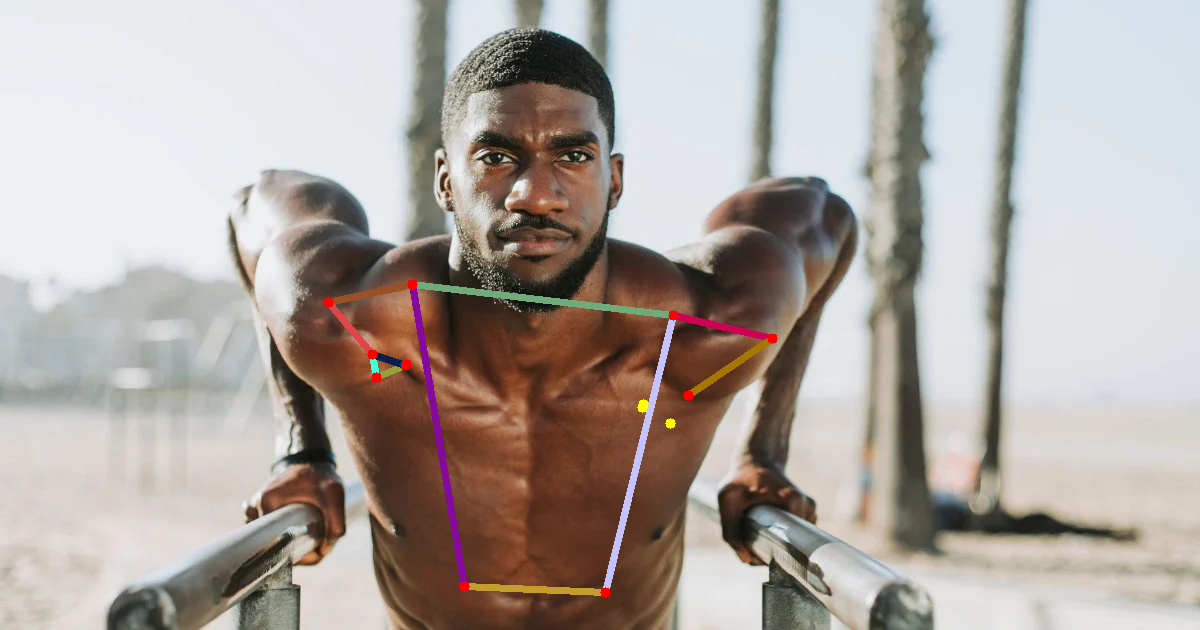

Skeletonized image saved at skeleton_output_single_image.jpg


In [ ]:
import cv2
import mediapipe as mp
import random
from google.colab.patches import cv2_imshow  # Import the alternative display method

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Define the skeleton connections (excluding points from 0 to 9)
SELECTED_CONNECTIONS = [
    (11, 13), (12, 14), (13, 15), (14, 16),
    (15, 17), (16, 18), (17, 19), (18, 20), (16, 20), (15, 19),
    (11, 12), (11, 23), (12, 24), (23, 24),  (23, 25), (24, 26),
    (26, 28), (25, 27), (28, 32), (28, 30), (30, 32), (27, 29), (27, 31), (29, 31)
]

# Function to generate random colors for lines
def generate_random_color():
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Load a single image
img_path = '/content/full_body_bodyweight_image.webp'  # Change this path to your image file
img = cv2.imread(img_path)

if img is None:
    print("Image not found!")
else:
    # Convert BGR to RGB (required by MediaPipe)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Initialize MediaPipe Pose
    results = pose.process(img_rgb)

    # If landmarks are detected, proceed with drawing
    if results.pose_landmarks:
        # Loop through selected connections and draw them with random colors and thicker lines
        for connection in SELECTED_CONNECTIONS:
            start_idx, end_idx = connection
            start_landmark = results.pose_landmarks.landmark[start_idx]
            end_landmark = results.pose_landmarks.landmark[end_idx]
            # Check if both landmarks are detected
            if start_landmark.visibility > 0.5 and end_landmark.visibility > 0.5:
                # Get the (x, y) coordinates and draw the line between selected points
                start_point = (int(start_landmark.x * img.shape[1]), int(start_landmark.y * img.shape[0]))
                end_point = (int(end_landmark.x * img.shape[1]), int(end_landmark.y * img.shape[0]))
                color = generate_random_color()  # Generate a random color for each line
                cv2.line(img, start_point, end_point, color, 5)  # Draw the connection with thicker lines

        # Optionally: Draw only specific landmarks (e.g., hips, knees, ankles, feet, eyes)
        for i in range(11, 33):  # Draw points from 11 to 32 (excluding 0-9)
            landmark = results.pose_landmarks.landmark[i]
            if landmark.visibility > 0.5:  # Check if the landmark is visible
                point = (int(landmark.x * img.shape[1]), int(landmark.y * img.shape[0]))
                cv2.circle(img, point, 5, (0, 0, 255), -1)  # Draw a red circle at each landmark
            else:
                # Handle cases where landmarks are not detected
                point = (int(landmark.x * img.shape[1]), int(landmark.y * img.shape[0]))
                cv2.circle(img, point, 5, (0, 255, 255), -1)  # Use yellow to indicate missing landmarks

        # Save the output image with skeleton in the output folder
        output_img_path = 'skeleton_output_single_image.jpg'  # Change output path as needed
        cv2.imwrite(output_img_path, img)

        # Display the output image in Colab (optional)
        cv2_imshow(img)

        print(f"Skeletonized image saved at {output_img_path}")
    else:
        print("No landmarks detected.")


In [ ]:
!unzip /content/sample.zip

Archive:  /content/sample.zip
   creating: sample/
   creating: sample/1/
  inflating: sample/1/1_sample.jpg   
  inflating: sample/1/2_sample.jpg   
  inflating: sample/1/testing_image.jpg  
  inflating: sample/1/testing_image2.jpg  
  inflating: sample/1/test_3.jpg     
   creating: sample/2/
  inflating: sample/2/online_image.jpg  
  inflating: sample/2/sample_3.webp  
  inflating: sample/2/sample_4.jpg   
  inflating: sample/2/sample_5.jpg   


In [ ]:
import os
import cv2
import mediapipe as mp
import csv

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Initialize MediaPipe drawing module
mp_drawing = mp.solutions.drawing_utils

# Define body landmark names (from 11 to 32)
landmark_names = [
    "Left Shoulder", "Right Shoulder", "Left Elbow", "Right Elbow", "Left Wrist", "Right Wrist",
    "Left Pinky", "Right Pinky", "Left Index", "Right Index", "Left Thumb", "Right Thumb", "Left Hip", "Right Hip",
    "Left Knee", "Right Knee", "Left Ankle", "Right Ankle", "Left Heel", "Right Heel",
    "Left Foot Index", "Right Foot Index"
]

# Define the header for the CSV
header = ['Image Name']
for name in landmark_names:
    header.extend([f'{name} X', f'{name} Y', f'{name} Z'])

# Define skeleton connections for the body (excluding points 0-9)
SELECTED_CONNECTIONS = [
    (11, 13), (12, 14), (13, 15), (14, 16),
    (15, 17), (16, 18), (17, 19), (18, 20), (16, 20), (15, 19),
    (11, 12), (11, 23), (12, 24), (23, 24),  (23, 25), (24, 26),
    (26, 28), (25, 27), (28, 32), (28, 30), (30, 32), (27, 29), (27, 31), (29, 31)
]

# Define the input and output directories
input_folder = '/content/sample'
output_folder = '/content/sample_ans'
os.makedirs(output_folder, exist_ok=True)

# Initialize dictionary to count images without detected landmarks
subfolder_counter = {}

# Loop through each subfolder
for subfolder in os.listdir(input_folder):
    subfolder_path = os.path.join(input_folder, subfolder)
    if os.path.isdir(subfolder_path):
        output_subfolder = os.path.join(output_folder, subfolder)
        os.makedirs(output_subfolder, exist_ok=True)

        # Create a CSV file for the subfolder
        csv_file_path = os.path.join(output_folder, f'{subfolder}_landmarks.csv')
        with open(csv_file_path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(header)  # Write CSV header

            # Initialize count for images without landmarks
            no_landmark_count = 0

            # Loop through images in subfolder
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    continue

                # Convert to RGB (for MediaPipe)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Process the image to get pose landmarks
                results = pose.process(img_rgb)

                # Prepare row data (image name + landmark coordinates)
                row = [img_name]

                if results.pose_landmarks:
                    # Draw skeleton
                    for connection in SELECTED_CONNECTIONS:
                        start_idx, end_idx = connection
                        if (
                            start_idx in range(11, 33) and end_idx in range(11, 33) and
                            results.pose_landmarks.landmark[start_idx].visibility > 0.5 and
                            results.pose_landmarks.landmark[end_idx].visibility > 0.5
                        ):
                            start = results.pose_landmarks.landmark[start_idx]
                            end = results.pose_landmarks.landmark[end_idx]

                            start_point = (int(start.x * img.shape[1]), int(start.y * img.shape[0]))
                            end_point = (int(end.x * img.shape[1]), int(end.y * img.shape[0]))

                            cv2.line(img, start_point, end_point, (0, 255, 0), 1)  # **Green & Thick**

                    # Draw keypoints and save coordinates
                    for i, landmark_name in enumerate(landmark_names, start=11):
                        landmark = results.pose_landmarks.landmark[i]
                        if landmark.visibility > 0.5:  # Only draw visible points
                            x = int(landmark.x * img.shape[1])
                            y = int(landmark.y * img.shape[0])
                            z = landmark.z

                            # Draw landmark point
                            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)  # **Red Dots**

                            # Save landmark data
                            row.extend([x, y, z])
                        else:
                            row.extend([0, 0, 0])  # If landmark is not visible, fill with zero
                else:
                    row.extend([0, 0, 0] * len(landmark_names))  # No landmarks detected → Fill with zeros
                    no_landmark_count += 1  # Increase missing landmark count

                # Write row to CSV
                writer.writerow(row)

                # Save the skeletonized image
                output_image_path = os.path.join(output_subfolder, img_name)
                cv2.imwrite(output_image_path, img)

            # Store subfolder count of images without landmarks
            subfolder_counter[subfolder] = no_landmark_count

        print(f"Processed {subfolder}: {no_landmark_count} images had no landmarks detected.")

# Print summary of missing landmarks per subfolder
print("\nSummary of Missing Landmarks per Subfolder:")
for subfolder, count in subfolder_counter.items():
    print(f"{subfolder}: {count} images")


Processed 1: 1 images had no landmarks detected.
Processed 2: 1 images had no landmarks detected.

Summary of Missing Landmarks per Subfolder:
1: 1 images
2: 1 images


In [ ]:
!zip -FF /content/USED_DATASET.zip --out repaired13.zip

Streaming output truncated to the last 5000 lines.
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1721.jpg  (13397 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1723.jpg  (3760 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1752.jpg  (56109 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1766.jpg  (6035 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1769.jpg  (12837 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_178.jpg  (13196 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1782.jpg  (32689 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1783.jpg  (9098 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1786.jpg  (9796 bytes)
 copying: USED_DATASET/AUG_TRAIN/RevolvedTria

In [ ]:
!unzip /content/repaired13.zip

Streaming output truncated to the last 5000 lines.
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1690.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1716.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1721.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1723.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1752.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1766.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1769.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_178.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1782.jpg  
  inflating: USED_DATASET/AUG_TRAIN/RevolvedTriangle_ParivrttaTrikonasana/aug_0_1783.jpg  
  inflating: USED_DATASET/AUG_TRAIN/Revo

In [ ]:
import os
import cv2
import mediapipe as mp
import csv
import shutil

# Initialize MediaPipe Pose model with min_detection_confidence
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

# Define MediaPipe drawing utilities
mp_drawing = mp.solutions.drawing_utils

# Define landmark names from 11 to 32 (selected landmarks only)
landmark_names = [
    "Left_Shoulder", "Right_Shoulder", "Left_Elbow", "Right_Elbow", "Left_Wrist", "Right_Wrist",
    "Left_Pinky", "Right_Pinky", "Left_Index", "Right_Index", "Left_Thumb", "Right_Thumb", "Left_Hip", "Right_Hip",
    "Left_Knee", "Right_Knee", "Left_Ankle", "Right_Ankle", "Left_Heel", "Right_Heel",
    "Left_Foot_Index", "Right_Foot_Index"
]

# Define CSV header with X, Y, and Visibility for each selected landmark
header = ['Image Name']
for name in landmark_names:
    header.extend([f'{name}_X', f'{name}_Y', f'{name}_Visibility'])

# Define skeleton connections
SELECTED_CONNECTIONS = [
    (11, 13), (12, 14), (13, 15), (14, 16),
    (15, 17), (16, 18), (17, 19), (18, 20), (16, 20), (15, 19),
    (11, 12), (11, 23), (12, 24), (23, 24),  (23, 25), (24, 26),
    (26, 28), (25, 27), (28, 32), (28, 30), (30, 32), (27, 29), (27, 31), (29, 31)
]

# Define input and output directories
input_folder = '/content/USED_DATASET/VALIDATION_TEST'
output_folder = '/content/SKELETONIZED_TEST'
no_landmarks_folder = '/content/NO_LANDMARKS_DETECTED_3'
os.makedirs(output_folder, exist_ok=True)
os.makedirs(no_landmarks_folder, exist_ok=True)

# Dictionary to count images without detected landmarks per subfolder
subfolder_counter = {}

# Loop through each subfolder
for subfolder in os.listdir(input_folder):
    subfolder_path = os.path.join(input_folder, subfolder)
    if os.path.isdir(subfolder_path):
        output_subfolder = os.path.join(output_folder, subfolder)
        os.makedirs(output_subfolder, exist_ok=True)

        # Create subfolder for no landmark images
        no_landmarks_subfolder = os.path.join(no_landmarks_folder, subfolder)
        os.makedirs(no_landmarks_subfolder, exist_ok=True)

        # Create a CSV file for the subfolder
        csv_file_path = os.path.join(output_folder, f'{subfolder}_landmarks.csv')
        with open(csv_file_path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(header)  # Write CSV header

            # Initialize count for images without landmarks
            no_landmark_count = 0

            # Loop through images in subfolder
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    continue

                # Convert to RGB (for MediaPipe)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Process the image to get pose landmarks
                results = pose.process(img_rgb)

                # Prepare row data (image name + landmark coordinates)
                row = [img_name]

                if results.pose_landmarks:
                    # Draw skeleton for selected landmarks
                    for connection in SELECTED_CONNECTIONS:
                        start_idx, end_idx = connection
                        start = results.pose_landmarks.landmark[start_idx]
                        end = results.pose_landmarks.landmark[end_idx]

                        start_point = (int(start.x * img.shape[1]), int(start.y * img.shape[0]))
                        end_point = (int(end.x * img.shape[1]), int(end.y * img.shape[0]))

                        cv2.line(img, start_point, end_point, (255, 255, 255), 2)  # White & Thickness 2

                    # Draw keypoints for selected landmarks and save coordinates
                    for landmark_name in range(11, 33):  # Only landmarks from 11-32
                        landmark = results.pose_landmarks.landmark[landmark_name]
                        x = int(landmark.x * img.shape[1])
                        y = int(landmark.y * img.shape[0])
                        visibility = landmark.visibility

                        # Draw landmark point if visible
                        if visibility > 0.5:
                            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)  # Red Dots

                        # Save landmark data (X, Y, Visibility)
                        row.extend([x, y, visibility])

                    # Write row to CSV
                    writer.writerow(row)

                    # Save the skeletonized image
                    output_image_path = os.path.join(output_subfolder, img_name)
                    cv2.imwrite(output_image_path, img)
                else:
                    no_landmark_count += 1

                    # Move image to "No_Landmarks" subfolder
                    destination_path = os.path.join(no_landmarks_subfolder, img_name)
                    shutil.move(img_path, destination_path)

                    if os.path.exists(destination_path):
                        print(f"Moved {img_name} to {destination_path}")
                    else:
                        print(f"Failed to move {img_name}")

            subfolder_counter[subfolder] = no_landmark_count

        print(f"Processed {subfolder}: {no_landmark_count} images had no landmarks detected.")

print("\nSummary of Missing Landmarks per Subfolder:")
for subfolder, count in subfolder_counter.items():
    print(f"{subfolder}: {count} images")


Moved DownwardDog_AdhoMukhaShanasana_image_72.jpg to /content/NO_LANDMARKS_DETECTED_3/DownwardDog_AdhoMukhaShanasana/DownwardDog_AdhoMukhaShanasana_image_72.jpg
Moved DownwardDog_AdhoMukhaShanasana_image_65.jpg to /content/NO_LANDMARKS_DETECTED_3/DownwardDog_AdhoMukhaShanasana/DownwardDog_AdhoMukhaShanasana_image_65.jpg
Moved DownwardDog_AdhoMukhaShanasana_image_42.jpg to /content/NO_LANDMARKS_DETECTED_3/DownwardDog_AdhoMukhaShanasana/DownwardDog_AdhoMukhaShanasana_image_42.jpg
Moved DownwardDog_AdhoMukhaShanasana_image_101.jpg to /content/NO_LANDMARKS_DETECTED_3/DownwardDog_AdhoMukhaShanasana/DownwardDog_AdhoMukhaShanasana_image_101.jpg
Moved DownwardDog_AdhoMukhaShanasana_image_77.jpg to /content/NO_LANDMARKS_DETECTED_3/DownwardDog_AdhoMukhaShanasana/DownwardDog_AdhoMukhaShanasana_image_77.jpg
Moved DownwardDog_AdhoMukhaShanasana_image_85.jpg to /content/NO_LANDMARKS_DETECTED_3/DownwardDog_AdhoMukhaShanasana/DownwardDog_AdhoMukhaShanasana_image_85.jpg
Moved DownwardDog_AdhoMukhaShana

In [ ]:
import shutil
from google.colab import files

# Define the folder to zip
folder_path = "/content/USED_DATASET"  # Replace with your actual folder name
zip_path = "/content/USED_DATASET.zip"

# Zip the folder
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Some problem with the version -> opencv and mediapipe were using diff versions of numpy, that's why we have to do it
# Step 1: Upgrade all key packages to compatible versions
!pip install --upgrade numpy tensorflow opencv-python mediapipe

# Step 2: Verify installed versions
import numpy, tensorflow, cv2, mediapipe
print(f"NumPy: {numpy.__version__}")
print(f"TensorFlow: {tensorflow.__version__}")
print(f"OpenCV: {cv2.__version__}")
print(f"MediaPipe: {mediapipe.__version__}")

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

NameError: name 'core' is not defined

**WrongPose_NoPose**

In [ ]:
import os
import shutil

# Define the folder path where the images are located
input_folder = '/content/drive/MyDrive/VirtualGym/USED_DATASET/TEST/TEST_DATA/GOOGLE_WRONGPOSE_NOPOSE_TEST'  # Change to your folder path
output_folder = '/content/WrongPose_NoPose_Test_Renamed'

# Create the new output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all files in the folder
for count, filename in enumerate(os.listdir(input_folder)):
    # Check if the file is an image
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', 'PNG', 'JPG', 'JPEG')):
        # Generate a new name for each image (e.g., WrongPose_NoPose_1.jpg, etc.)
        new_name = f"WrongPose_NoPose_{count + 1}.jpg"

        # Define the new image path
        new_image_path = os.path.join(output_folder, new_name)
        old_image_path = os.path.join(input_folder, filename)

        # Copy the image to the new folder with the new name
        shutil.copy2(old_image_path, new_image_path)

print(f"Renaming complete! {count + 1} images saved to: {output_folder}")


Renaming complete! 94 images saved to: /content/WrongPose_NoPose_Test_Renamed


In [ ]:
import os
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

# Define skeleton connections
SELECTED_CONNECTIONS = [
    (11, 13), (12, 14), (13, 15), (14, 16),
    (15, 17), (16, 18), (17, 19), (18, 20), (16, 20), (15, 19),
    (11, 12), (11, 23), (12, 24), (23, 24),  (23, 25), (24, 26),
    (26, 28), (25, 27), (28, 32), (28, 30), (30, 32), (27, 29), (27, 31), (29, 31)
]

# Define input and output directories
input_folder = '/content/WrongPose_NoPose_Test_Renamed'
output_folder = '/content/WrongPose_NoPose_Test_final'
os.makedirs(output_folder, exist_ok=True)

# Process each image in the folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipped (unreadable): {img_name}")
        continue

    # Convert to RGB for MediaPipe
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process image to get pose landmarks
    results = pose.process(img_rgb)

    # Draw skeleton lines and red dots for selected landmarks
    if results.pose_landmarks:
        for connection in SELECTED_CONNECTIONS:
            start_idx, end_idx = connection
            start = results.pose_landmarks.landmark[start_idx]
            end = results.pose_landmarks.landmark[end_idx]

            start_point = (int(start.x * img.shape[1]), int(start.y * img.shape[0]))
            end_point = (int(end.x * img.shape[1]), int(end.y * img.shape[0]))

            # Draw white lines for connections
            cv2.line(img, start_point, end_point, (255, 255, 255), 2)

            # Draw red dots for the selected joint points
            cv2.circle(img, start_point, 2, (0, 0, 255), -1)
            cv2.circle(img, end_point, 2, (0, 0, 255), -1)

    # Save the image (skeletonized or not)
    output_image_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_image_path, img)

print("Processing complete. Check the output folder!")


Processing complete. Check the output folder!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/WrongPose_NoPose_Test_final /content/drive/MyDrive/VirtualGym/USED_DATASET/TEST/SKELETONIZED_TEST